# Session 3: 8 March 2018

## Probability distributions (recap), the Normal (Gaussian) Distribution

# Some updates

## Check out the new look of the [website](https://abstractgeek.github.io/rusmalai-math-workshop/)

## a few casual reads
 - ### [Not Just a Theory—The Utility of Mathematical Models in Evolutionary Biology](http://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002017)
 - ### [Cartoon Guide to Statistis](http://www.joinville.udesc.br/portal/professores/veriano/materiais/Cartoon_guide_to_Statistics_large.pdf)

## Challenges/Puzzles

- ### Challenges for material from Sessions 1-2 are up on the [website](https://abstractgeek.github.io/rusmalai-math-workshop/)

# Sampling a finite number of times

Let's go back to our well understood example of a coin toss! 

We know that a coin toss is a "Bernoulli" experiment. This means that:
- $ \Omega = \{H,T\} $
- P(H) = p
- P(T) = 1-p

What if we were to take this coin and toss it multiple (N) times? It's no longer "Bernoulli", right? So what is it?
 - $ \Omega $ would be all possible combinations of H and T
 - Probability of a given sequence in this $\Omega$ with n Heads and N-n Tails
 $$ p^n (1-p)^{N-n} $$
 - but there are ${N}\choose{n}$ ways of getting n Heads and N-n Tails in a sequence
 
Voila! and we have derived the Binomial distribution
$$ P(n;p) = \binom{N}{n} p^n (1-p)^{N-n} $$


## What about cases where there are multiple outcomes?

Well, in that case, it is called a multinomial distribution.

For instance if there are 4 possible outcomes e.g. in the case of sampling 20 nucleotides:

$$ P(3 As, 2 Gs, 5 Ts, 10 Cs) = \binom{20}{3}\binom{17}{2}\binom{15}{5}\binom{10}{10} p_A^3 p_G^2 p_T^5 (1-p_A-p_G-p_T)^{10} $$

In [1]:
# initializing the python environment 
# run this section before you run any further code
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sp 
from random import randint
from scipy.stats import poisson
import scipy.stats as stats
import matplotlib.mlab as mlab
import math

The code below simulates a binomial $B(N,p)$ distribution (in other words samples from a binmoial distribution with N=10 elements) 10,000 times. It then calculates the number of ones (Heads) in each of these 10,000 sequences and plots a histogram of that.

A typical sequence [1 1 0 0 1 1 1 0 1 1]


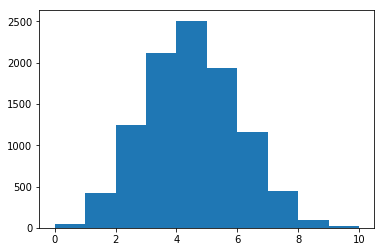

Average number of ones =  4.0022
Variance =  2.43659516


In [8]:
N = 10 # number of elements in each sequence
p = 0.4  # probability of having 1
seq = np.zeros(10000) # we shall sample 10000 such sequences

for i in range(0,10000):
    flips = np.random.binomial(1,p,size=N)
    seq[i] = sum(flips)

print("A typical sequence",flips)
plt.hist(seq, bins=range(11))
plt.show()

print('Average number of ones = ',np.mean(seq))
print('Variance = ',np.var(seq))

Check that the average number of ones in the sequences generated is (close to) $Np$. 
Could you check if this consistent with the expected value of a Binomial $B(N,p)$ distribution?
What about the variance? What is should it be? Does it match?

Let's now go back to the star counting example which we discussed in Session 2. But this time let's go one step ahead and simulate it (don't worry you don't need to know coding. do try to understand the code though. for this take help of the comments in the code)

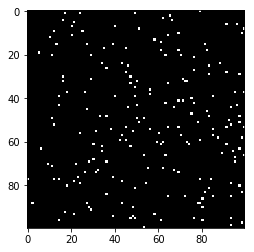

In [2]:
N = 100 # size of the grid will be NxN
p = 0.02 # probability of having a 1 at any position in the grid
s = np.random.binomial(1,p, N*N) # generate a sequence of N^2 elements. this is still in 1D
NightSky = np.reshape(a=s,newshape=(N,N)) # we now reshape 1D array of N^2 elements into a 2D grid of NxN  
plt.imshow(NightSky, cmap='gray') # show the grid as a grayscale image 
plt.show() 

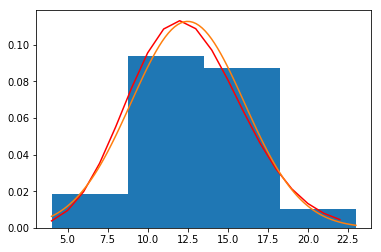

Average number of stars in nxn patch = 13.063365651
Satndard deviation = 3.31842022235
The square root of nxnxp = 3.53553390593


In [5]:
n = 25 # size of the small (smaller than N) window of nxn
window_count = np.ones((n,n)) # create a grid of nxn and fill it with ones
# overlay it over a patch in the original grid
# now multiply each element of the small window with every corresponding element of the original grid that it overlies and sum them
# check that this gives us the number of ones in that nxn grid. 
# convolving involves doing this through the entire NxN over all possible nxn chunks of it   
count = sp.convolve2d(NightSky,window_count, mode='valid') 
# uncomment the 2 lines below to see what the convolution looks like
# plt.imshow(outcount, cmap='gray')
# plt.show()

# Now plot a histogram of no. of ones encountered in all nxn windows over the night sky (i.e. NxN grid)
m, bins, patches = plt.hist(count.flatten(), bins=4 ,density='True')   
# we will now overlay a Poisson distribution with lambda = nxnxp
x = np.arange(min(bins), max(bins))
plt.plot(x, poisson.pmf(x, n*n*p),'r-')
# on top of this we will overlay a Gaussian distribution with mean = nxnxp and variance = n*n*p 
x = np.linspace(min(bins),max(bins), 100)
plt.plot(x,mlab.normpdf(x, n*n*p, np.sqrt(n*n*p)))
plt.show()
print('Average number of stars in nxn patch =',np.mean(count.flatten())) # print the avg number of stars in nxn 
print('Satndard deviation =',np.std(count.flatten())) # print the standard deviation 
print('The square root of nxnxp =',np.sqrt(n*n*p)) # print the value of suare root of nxnxp

Notice that the avearge number of stars in a n x n patch is $n^2p$ and so is the variance! 

This is NOT surprising! The Poisson distribution is known to have mean = variance = $n^2p$. It is a very special distribution.  

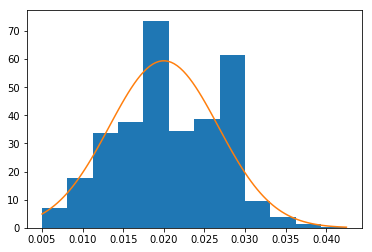

In [32]:
n = 20
window_mean = np.ones((n,n))/(n*n) # create a grid of nxn and fill it with 1/(n^2) throughout
# convolve (same as previously done) this nxn grid with the original NxN grid
outmean = sp.convolve2d(NightSky,window_mean, mode='valid') 
# Now plot a histogram of avg no. of ones encountered over all nxn windows over the night sky (i.e. NxN grid)
m, bins, patches = plt.hist(outmean.flatten(), bins=12, density='True') 

mu = p
x = np.linspace(min(bins),max(bins),100)
plt.plot(x,mlab.normpdf(x, mu, np.std(outmean.flatten())))
plt.show()

Law of Large Numbers 
 - Weak Law
 - Strong Law

Central Limit Theorem